In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
cols = ["area", "perimeter", "compactness", "length",  "width", "asymmetry", "groove", 'class']
df = pd.read_csv("seeds_dataset.txt", names = cols, sep='\s+')

In [6]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


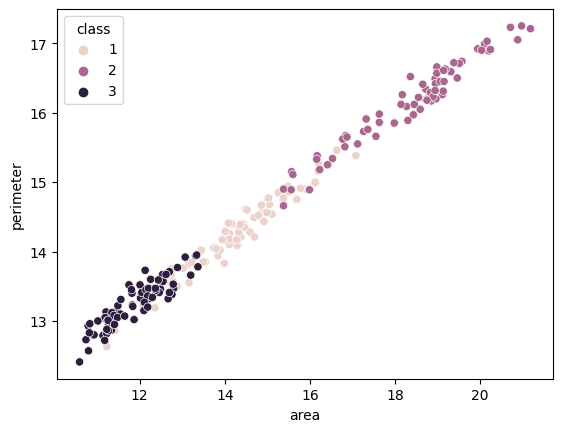

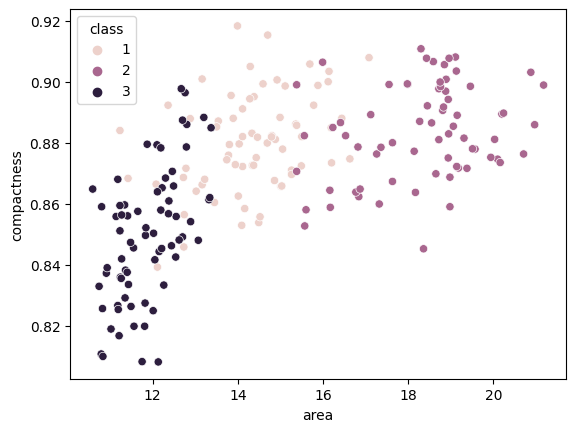

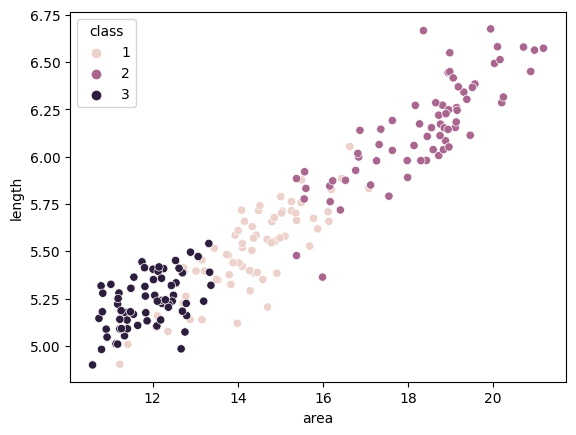

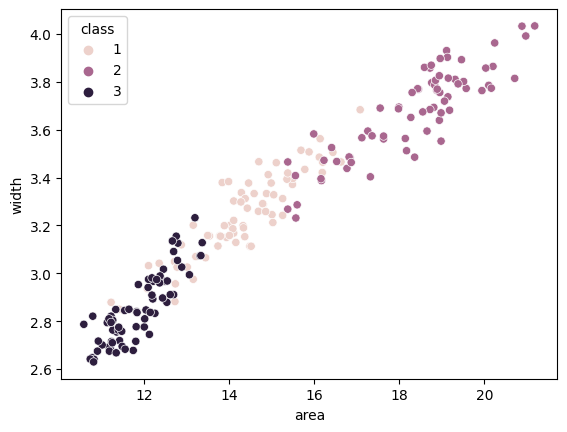

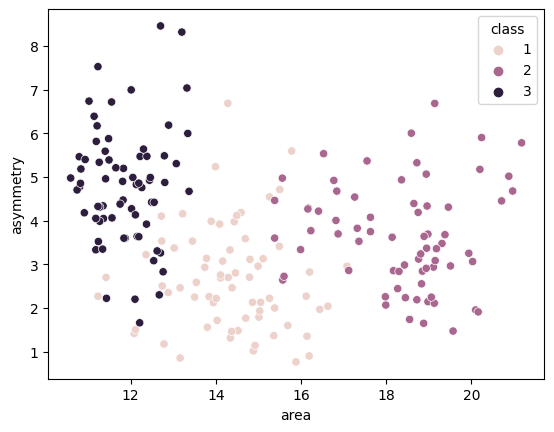

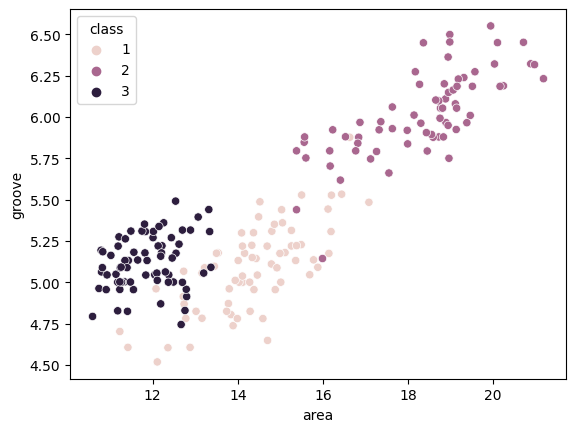

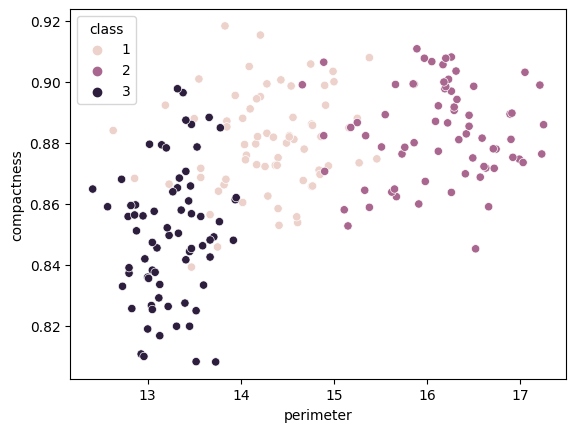

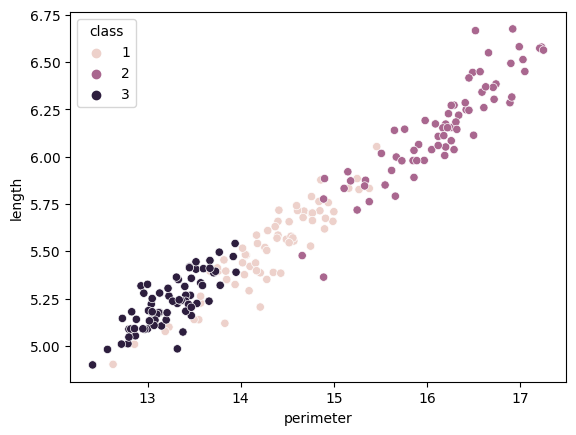

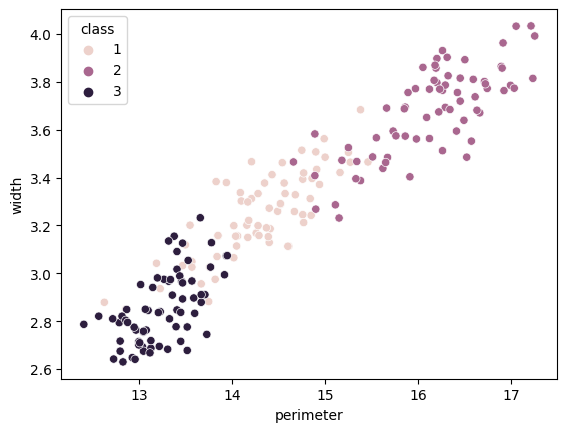

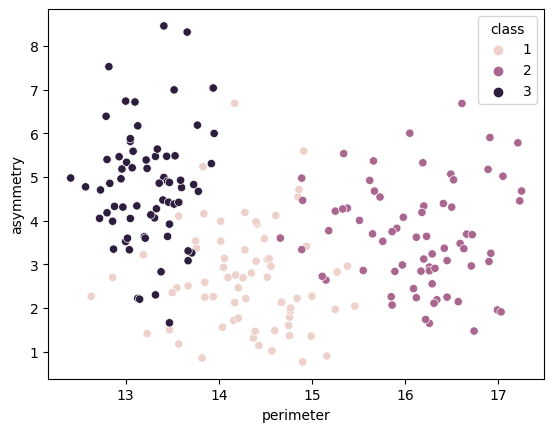

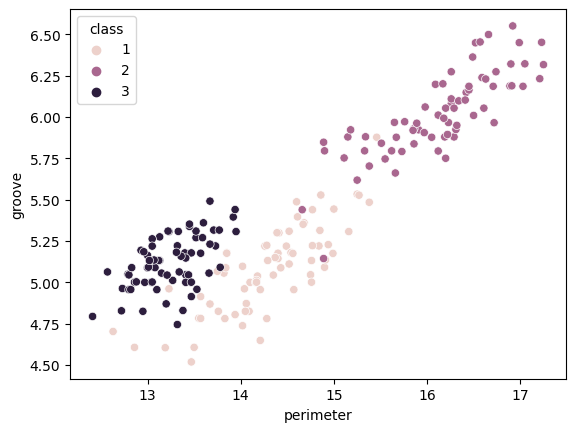

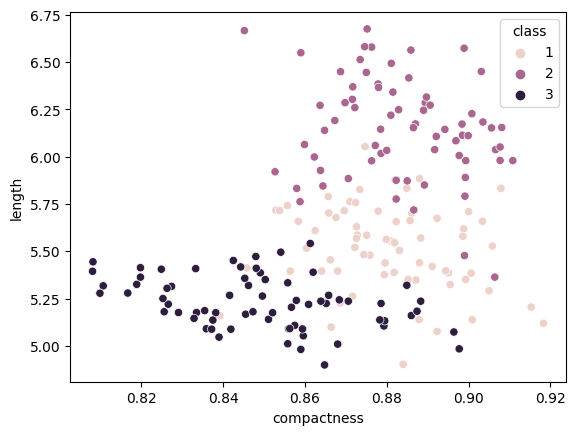

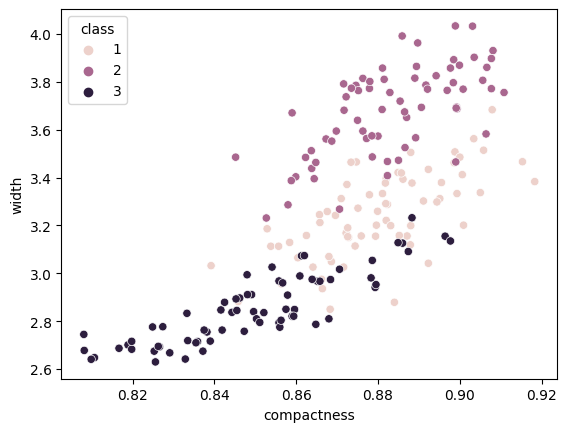

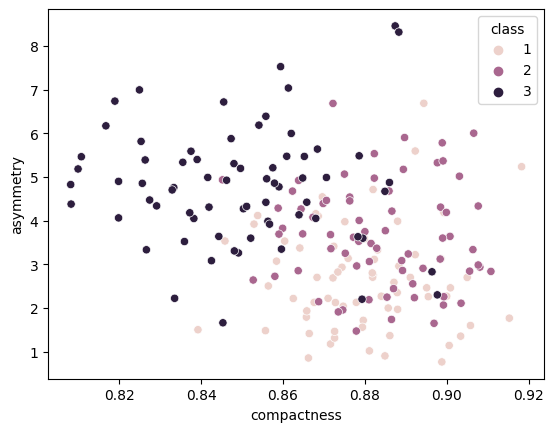

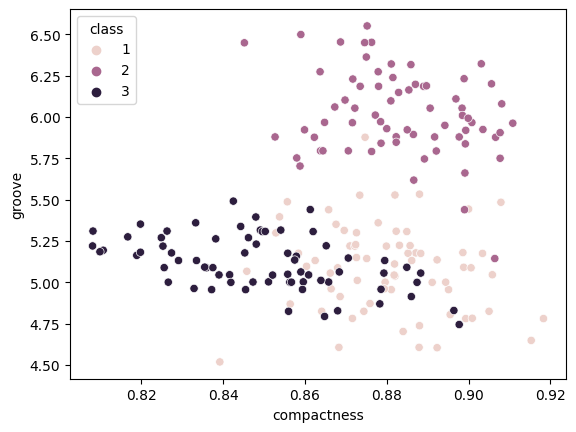

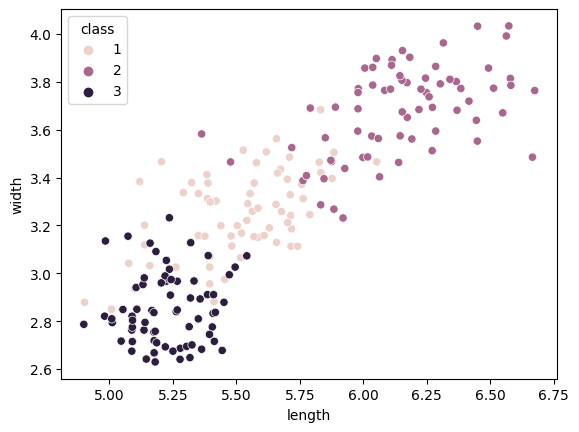

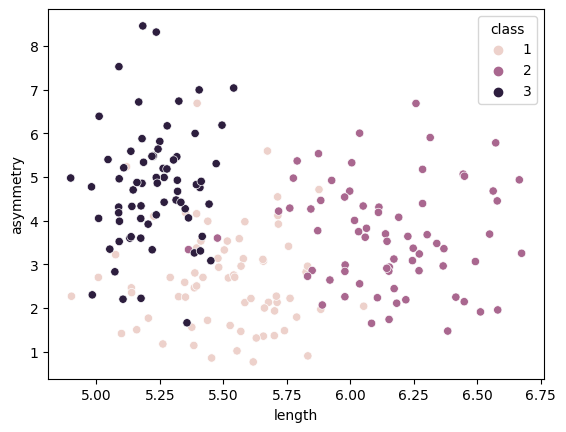

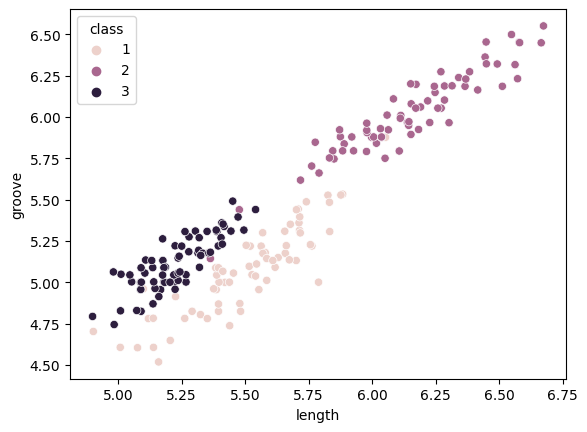

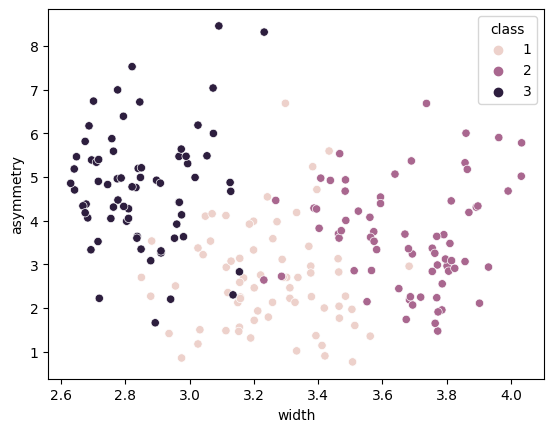

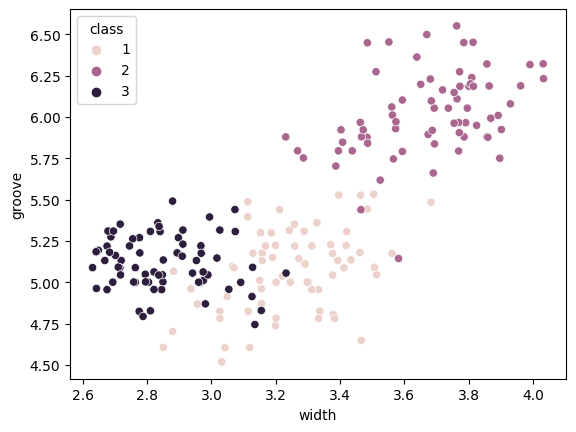

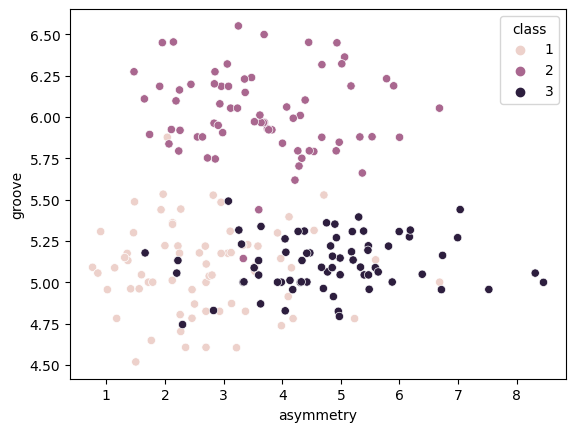

In [9]:
# Video method
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

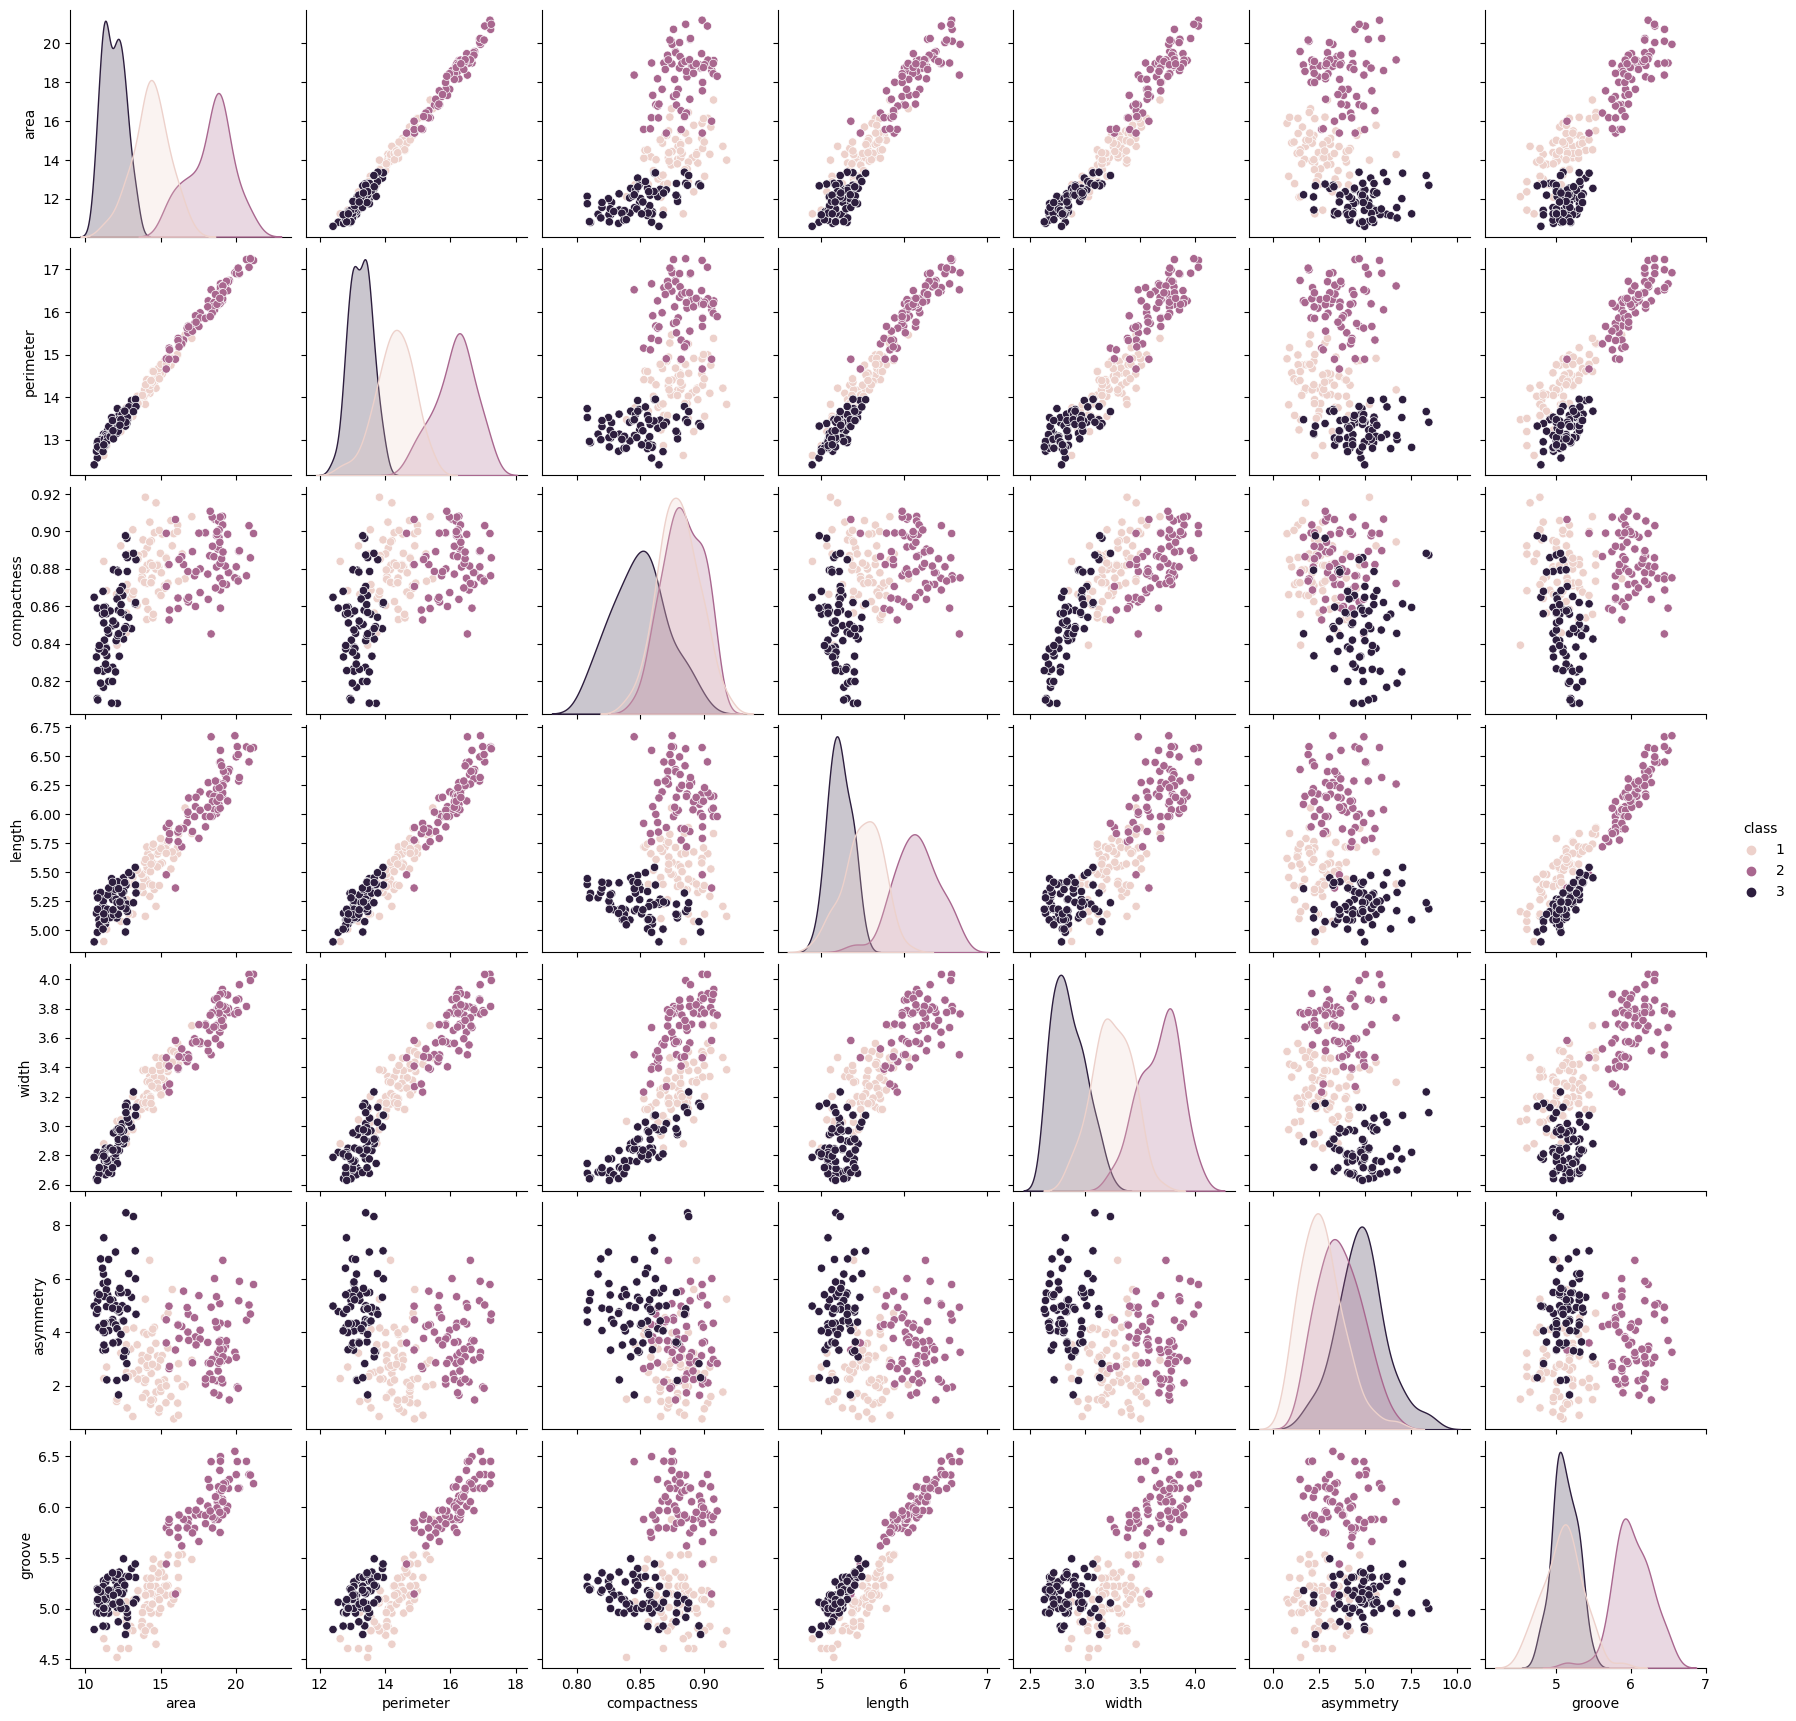

In [10]:
# Simpler method
sns.pairplot(df, hue="class")

# Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
x = 'perimeter'
y = 'asymmetry'
X = df[[x, y]].values

In [13]:
kmeans = KMeans(n_clusters=3).fit(X)

In [14]:
clusters = kmeans.labels_

In [17]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, 'class'])

<Axes: xlabel='perimeter', ylabel='asymmetry'>

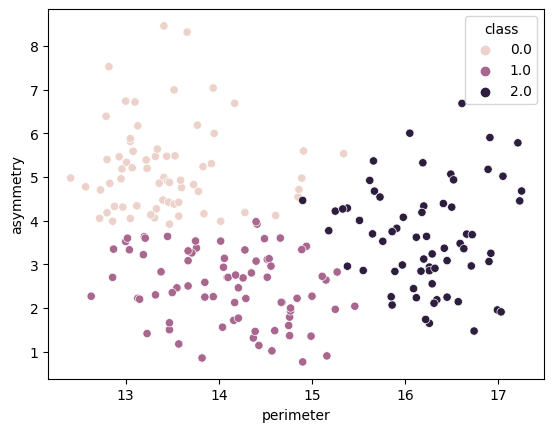

In [20]:
sns.scatterplot(x=x, y=y, hue='class', data=clusters_df)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

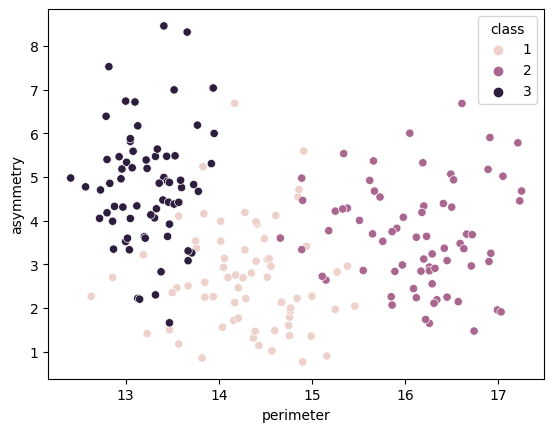

In [21]:
sns.scatterplot(x=x, y=y, hue='class', data=df)

# Higher Dimensions

In [22]:
X = df[cols[:-1]].values

In [23]:
kmeans = KMeans(n_clusters=3).fit(X)
clusters_all_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

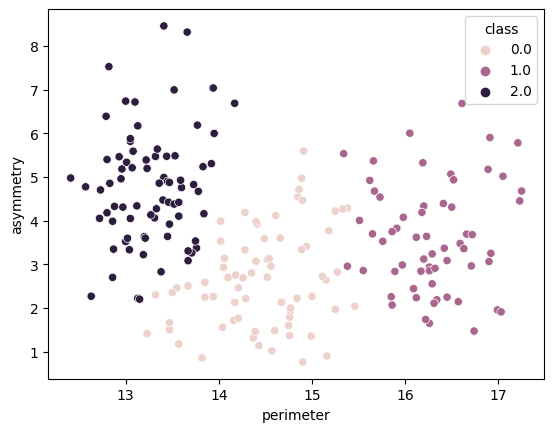

In [24]:
# KMeans classes
sns.scatterplot(x=x, y=y, hue='class', data=clusters_all_df)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

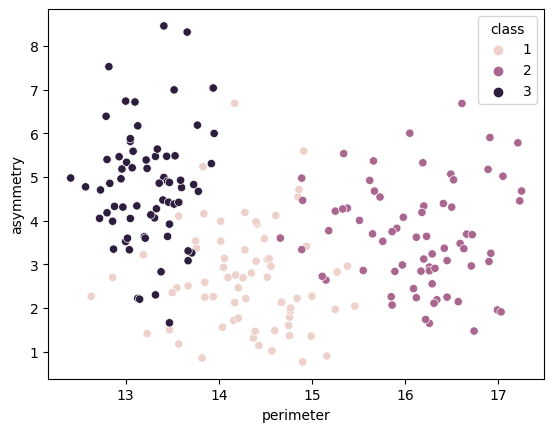

In [25]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)

# PCA

In [26]:
from sklearn.decomposition import PCA

In [28]:
X = df[cols[:-1]].values

In [29]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [32]:
X.shape, transformed_x.shape

((210, 7), (210, 2))

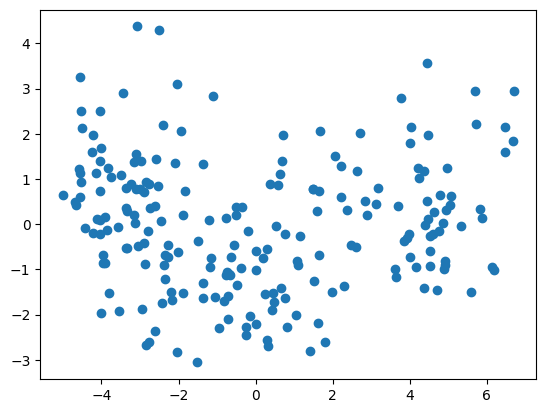

In [33]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [34]:
kmean_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns=['pca1', 'pca2', 'class'])

In [35]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1,1))), columns=['pca1', 'pca2', 'class'])

<Axes: xlabel='pca1', ylabel='pca2'>

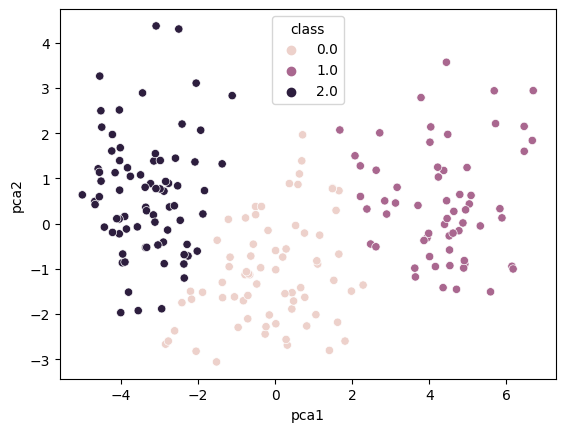

In [37]:
# KMeans classes
sns.scatterplot(x='pca1', y='pca2', hue='class', data=kmean_pca_df)

<Axes: xlabel='pca1', ylabel='pca2'>

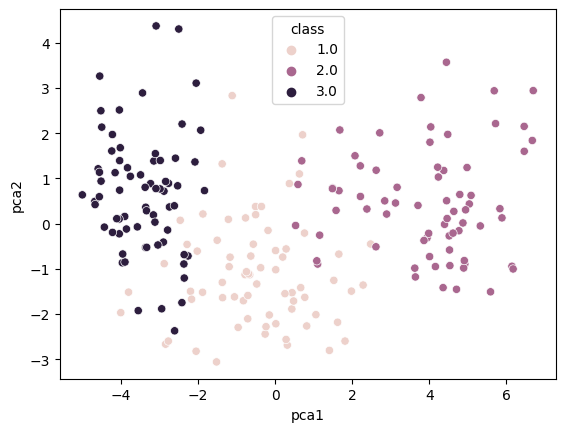

In [38]:
# Original classes
sns.scatterplot(x='pca1', y='pca2', hue='class', data=truth_pca_df)